In [1]:
from skimage import io #allows to read images
from matplotlib import pyplot
from pathlib import Path
from natsort import natsorted, ns # natural sorting
import os

### Data analysis step

Determine the characteristics of the data and statistics 

#### 1. Data source

Data was obtained from the following source 
https://data.mendeley.com/datasets/rscbjbr9sj/3

We are provided with an archive file containing a set of chest x-rays.  Images are provided in two separate folders, test and train.  Within those folders images are separated into two classes - normal and pneumonia.  

#### 2. Description of image files

File names for images of dieases lungs contain a unique anonymized person number as well as the text 'bacteris' or 'virus' indicating if the pnemonia was caused by a virus or bacteris.  Example person426_virus_873

File names for images of normal lungs contain the work 'NORMAL'. Example - NORMAL2-IM-1250-0001

In [2]:
import os
all_extensions = set([])
file_count = 0
for root, dirs, files in os.walk("E:\COURSES\Advanced Data Science With IBM\Advanced Data Science Capstone\\assignment\data\chest_xray"):
    for name in files:
        file_name, file_extension = os.path.splitext(name)
        file_count = file_count + 1
        all_extensions.add(file_extension)

print(all_extensions)

{'.jpeg'}


In [3]:
print(file_count)

5856


#### 3. Distribution of images in test vs train

In [4]:
test_count = 0
for root, dirs, files in os.walk("E:\COURSES\Advanced Data Science With IBM\Advanced Data Science Capstone\\assignment\data\chest_xray\\test"):
    for name in files:
        
        test_count = test_count + 1

print(test_count)

624


In [5]:
train_count = 0
for root, dirs, files in os.walk("E:\COURSES\Advanced Data Science With IBM\Advanced Data Science Capstone\\assignment\data\chest_xray\\train"):
    for name in files:
        
        train_count = train_count + 1

print(train_count)

5232


Train / Test split is about 89.4 / 10.6. Will probably redistribute the images abit to move the split closer to 80/20

#### 4. Size of the images

It was observed that there were a few images with very small size, less than 12kb.  Upon inspection of these images they appear to not contain a full view of the upper chest. Thus it was decided to remove these images since their field of view was not consistent with the majority of images.  

In [6]:
sizes = []
filenum = []
count = 0
discarded = []

test_images = []
test_labels = []

train_images = []
train_labels = []

#training set
for root, dirs, files in os.walk("E:\COURSES\Advanced Data Science With IBM\Advanced Data Science Capstone\\assignment\data\chest_xray\\train"):
    #print('dirs', dirs)
    for name in files:
        #print('name', name)
        #print(os.path.basename(root))
        
        stats = os.stat(os.path.join(root, name))
        count = count + 1
        
        sizes.append(stats.st_size/1000)
        
        if(stats.st_size/1000 < 12):
            discarded.append(os.path.join(root, name))
        else:
            train_images.append(os.path.join(root, name))
            train_labels.append(os.path.basename(root))
        
        filenum.append(count)

#test set
for root, dirs, files in os.walk("E:\COURSES\Advanced Data Science With IBM\Advanced Data Science Capstone\\assignment\data\chest_xray\\test"):
    #print('dirs', dirs)
    for name in files:
        #print('name', name)
        #print(os.path.basename(root))
        
        stats = os.stat(os.path.join(root, name))
        count = count + 1
        
        sizes.append(stats.st_size/1000)
        
        if(stats.st_size/1000 < 12):
            discarded.append(os.path.join(root, name))
        else:
            test_images.append(os.path.join(root, name))
            test_labels.append(os.path.basename(root))
        
        filenum.append(count)

In [7]:
len(sizes)

5856

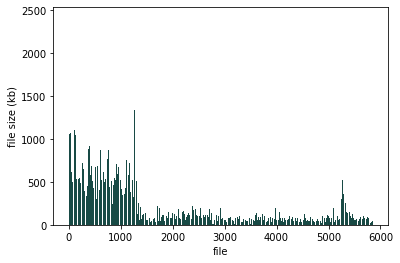

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('file')
plt.ylabel('file size (kb)')
plt.bar(filenum, sizes, color='#184A45FF')
plt.show()

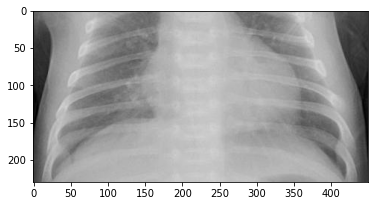

(230, 450, 3)


In [9]:
import matplotlib.pyplot as plt
im = io.imread(discarded[18])
imgplot = plt.imshow(im, cmap="gray")
plt.show()
print(im.shape)

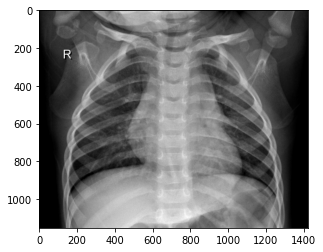

(1152, 1422)


In [10]:
im = io.imread(train_images[1])
imgplot = plt.imshow(im, cmap="gray")
plt.show()
print(im.shape)

If the shape of the image is longer in the x axis than it is in the y axis by certain threshold, then discard those images as they only show a section of the full chest image.

Maybe choose something based on the below images that were discarded like x/y must be greater than 0.5 to constitute an acceptible image.

In [11]:
for d in discarded:
    im = io.imread(d)
    x = im.shape[0]
    y = im.shape[1]
    print(x/y)

0.4336099585062241
0.38571428571428573
0.5756929637526652
0.3381742738589212
0.5900900900900901
0.43734643734643736
0.396
0.34791666666666665
0.3835616438356164
0.41712204007285975
0.37675350701402804
0.305668016194332
0.5168986083499006
0.3295194508009153
0.41102756892230574
0.408675799086758
0.3796095444685466
0.5782312925170068
0.5111111111111111
0.34397163120567376
0.3177737881508079
0.4864864864864865
0.4329004329004329
0.5350194552529183
0.5555555555555556
0.38271604938271603
0.3912087912087912
0.3170731707317073
0.5216450216450217
0.46466809421841543
0.36853002070393376
0.47216494845360824
0.5170940170940171
0.4010989010989011
0.5
0.5981308411214953
0.5371428571428571
0.6140350877192983
0.4202247191011236
0.3967611336032389
0.4838709677419355
0.3146067415730337
0.345
0.29596412556053814
0.4337899543378995
0.391304347826087
0.488
0.5213483146067416
0.40176600441501104
0.34130434782608693
0.39300411522633744
0.44719101123595506
0.3307291666666667
0.40186915887850466
0.386160714285

In [12]:
v = [x for x in sizes if x >= 250]
len(v)

1427

In [13]:
y = [x for x in sizes if x < 250]
len(y)

4429

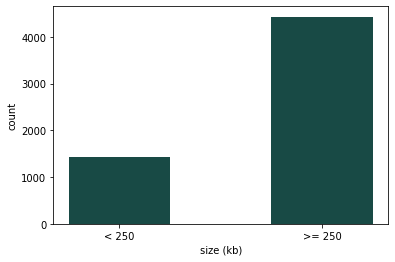

In [14]:
plt.xlabel('size (kb)')
plt.ylabel('count')
plt.bar(['< 250', '>= 250'], [1427, 4429], color='#184A45FF', width=0.5)
plt.show()

#### 4. Shape of images

In [15]:
print(sizes[0])

870.784


In [16]:
x = []
y = []
z = []
for root, dirs, files in os.walk("E:\COURSES\Advanced Data Science With IBM\Advanced Data Science Capstone\\assignment\data\chest_xray"):
    for name in files:
        #print(name)
        s = io.imread(os.path.join(root, name))
        x.append(s.shape[0])
        y.append(s.shape[1])
        if(len(s.shape) == 3):
            z.append(1)
        else:
            z.append(0)

In [17]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'x': x,
                   'y': y,
                   'z': z})

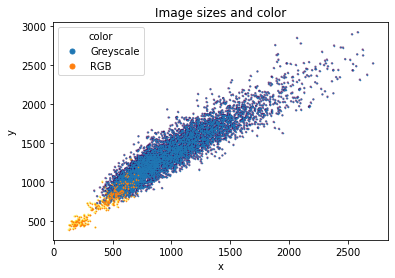

In [18]:
area = 2
plt.scatter(x, y, c=df.z, s=area,  alpha=0.5)
plt.title('Image sizes and color')
plt.xlabel('x')
plt.ylabel('y')
classes = [ 'Greyscale', 'RGB']
groups = df.groupby('z')
for name, group in groups:
    name = classes[0] if name == 0 else classes[1]
    plt.plot(group.x, group.y, marker='.', linestyle='', markersize=1, label=name)

plt.legend(title="color", markerscale=10)

plt.show()

 Since all the images are of different sizes, it will be necessary to reshape them to the same size.

## Data Preprocessing

The following steps need to be done in the data preprocessing step

#### Data Normalization Step

We perform a grayscale normalization to reduce the effect of illumination's differences.
Divide values by 255 to get a value between 0 and 1. 

#### Image Resize
images need to be resized to the same size - both training and test set

example using skimage

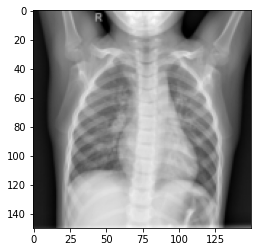

(150, 150)


In [19]:
from skimage.transform import resize
img = io.imread(train_images[0])
img_rescaled = resize(img, (150,150))

imgplot = plt.imshow(img_rescaled, cmap="gray")
plt.show()
print(img_rescaled.shape)

### Image Augmentation Step

In order to avoid overfitting problem, alter the training data with small transformations to reproduce the variations. Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [20]:
import tensorflow as tf
print(tf.__version__)


2.2.0


In [21]:
from keras.preprocessing.image import ImageDataGenerator

#### 1. Preprocessing the Training Set

Transformation on the images of the training set to avoid overfitting (data augmentation - see above)

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.05,
        horizontal_flip=True,
        width_shift_range=0.05,
        height_shift_range=0.05)

In [23]:
#create dataframe from train images - it is a list of absolute paths
#import numpy as np
#train_nparr = np.array(train_images)
#test_nparr = np.array(test_images)

import pandas as pd
data = {'file':train_images,'label':train_labels}
train_df = pd.DataFrame(data)


In [24]:
train_set = train_datagen.flow_from_dataframe(
    train_df,
    directory=None,
    x_col="file",
    y_col="label",
    weight_col=None,
    target_size=(128, 128),
    color_mode="grayscale",
    classes=None,
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
)

Found 5171 validated image filenames belonging to 2 classes.


#### 2. Preprocesing the Test Set

Here we need to keep the images as they were with no modifications but we have to feature scale the images to match the feature scaling done to the test images.

In [25]:
test_datagen = ImageDataGenerator(
        rescale=1./255
        )

In [26]:
data = {'file':test_images,'label':test_labels}
test_df = pd.DataFrame(data)

In [27]:
test_set = test_datagen.flow_from_dataframe(
    test_df,
    directory=None,
    x_col="file",
    y_col="label",
    weight_col=None,
    target_size=(128, 128),
    color_mode="grayscale",
    classes=None,
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
)

Found 624 validated image filenames belonging to 2 classes.


### Building the CNN

#### 1. Convolution

In [28]:
cnn = tf.keras.models.Sequential()

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=3,
                               activation='relu',
                               input_shape=(128,128,1)
                              ))

#### 2. Pooling

In [30]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Add a second Convolutional Layer

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=3,
                               activation='relu'
                              ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### 3. Flattening

In [32]:
cnn.add(tf.keras.layers.Flatten())

#### 4. Full Connection

In [33]:
#units = number of hidden neurons - larger number better for images
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### 5. Output Layer

In [34]:
#units = 1 for binary classification
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training The CNN

#### 1. Compiling the CNN

In [35]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### 2. Training the CNN and Evaluating

In [ ]:
cnn.fit(x = train_set, validation_data = test_set, epochs=25 )

Epoch 1/25
142/162 [=========================>....] - ETA: 3s - loss: 0.3790 - accuracy: 0.8411